**problem statement :**

The predicting of fare amount (inclusive of tolls) for a taxi ride, given the pickup and dropoff locations,the pickup date time and many other attributes given below.

**Target :**

fare_amount

**description of variables**

TID:-Unique ID

Vendor_ID:-Technology service vendor associated with cab company

New_User:-If a new user is taking the ride

toll_price:-toll tax amount

tip_amount:-tip given to driver (if any)

tax:-applicable tax

pickup_timestamp:-time at which the ride started

dropoff_timestamp:-time at which ride ended

passenger_count:-number of passenger during the ride

pickup_longitude:-pickup location longitude data

pickup_latitude:-pickup location latitude data

rate_category:-category assigned to different rates at which a customer is charged

store_and_fwd:-if driver stored the data offline and later forwarded

dropoff_longitude:-drop off longitude data

dropoff_latitude:-drop off latitude data

payment_type:-payment mode used by the customer (CRD = Credit Card, CSH - Cash, DIS - dispute, NOC - No Charge, UNK - Unknown)

surcharge:-surchage applicable on the trip

fare_amount:-trip fare (to be predicted)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.impute import SimpleImputer

In [2]:
# reading the train.csv 
data=pd.read_csv("../input/train.csv") 
#reading the test data
test=pd.read_csv("../input/test.csv")

In [3]:
data.head()

,TID,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount
0,AIX000688685,DST000532,NO,5.33,NaN,0.5,2015-06-26 21:26:00,2015-06-26 21:52:00,3,-73.865990,40.770710,1,NaN,-73.985572,40.776607,CSH,0.5,38.33
1,AIX000411386,DST000532,NO,0.00,1.9,0.5,2015-04-09 13:24:00,2015-04-09 13:36:00,1,-73.991757,40.735312,1,NaN,-74.002815,40.748917,CRD,0.0,11.90
2,AIX0001135810,DST000401,NO,0.00,3.0,0.5,2015-09-13 14:12:30,2015-09-13 14:30:57,1,-73.948541,40.789180,1,N,-73.978704,40.748040,CRD,0.0,18.00
3,AIX0001005019,DST000401,NO,0.00,NaN,0.5,2015-07-27 08:37:32,2015-07-27 08:42:02,2,-73.974527,40.755829,1,N,-73.977303,40.758622,CSH,0.0,5.00
4,AIX000393080,DST000532,NO,0.00,0.0,0.5,2015-04-26 23:23:00,2015-04-26 23:36:00,5,-73.998870,40.724800,1,NaN,-73.958580,40.708610,CRD,0.5,13.50


In [4]:
data.shape

(87958, 18)

In [5]:
data.describe()

,tolls_amount,tip_amount,mta_tax,passenger_count,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,surcharge,fare_amount
count,87958.000000,79150.000000,87958.000000,87958.000000,85346.000000,86168.000000,87958.000000,87679.000000,87544.000000,82693.000000,87958.000000
mean,0.271402,1.532579,0.497948,1.734908,-72.588214,39.991795,1.035312,-72.599128,39.995261,0.318153,15.225970
std,1.276428,2.369551,0.032496,1.401843,10.033457,5.509783,0.279604,9.992113,5.498756,0.361798,12.803014
min,0.000000,0.000000,-0.500000,0.000000,-81.169787,0.000000,0.000000,-74.436935,0.000000,-0.500000,0.000000
25%,0.000000,0.000000,0.500000,1.000000,-73.991988,40.735111,1.000000,-73.991470,40.733639,0.000000,8.150000
50%,0.000000,1.000000,0.500000,1.000000,-73.981738,40.752667,1.000000,-73.980077,40.752892,0.000000,11.400000
75%,0.000000,2.100000,0.500000,2.000000,-73.967010,40.767118,1.000000,-73.962918,40.768220,0.500000,17.000000
max,23.500000,98.550000,0.500000,6.000000,0.000000,50.514841,6.000000,0.000000,41.465904,2.500000,480.000000


In [6]:
#checking NA's 
data.isna().sum()

TID                       0
vendor_id                 0
new_user                  1
tolls_amount              0
tip_amount             8808
mta_tax                   0
pickup_datetime           0
dropoff_datetime          0
passenger_count           0
pickup_longitude       2612
pickup_latitude        1790
rate_code                 0
store_and_fwd_flag    41723
dropoff_longitude       279
dropoff_latitude        414
payment_type              0
surcharge              5265
fare_amount               0
dtype: int64

In [7]:
# removing rows where fare_amount is 0 as those rows cannot help us to predict the target(fare_amount)
data=data.loc[data.fare_amount>0,]

In [8]:
data['passenger_count'].value_counts()

1    61210
2    12342
5     5330
6     3696
3     3597
4     1769
0        7
Name: passenger_count, dtype: int64

In [9]:
#removing rows where passenger_count is zero
data=data[data["passenger_count"]>0]

In [10]:
#droping NA's from pickup_longitute,pickup_latitide,dropoff_latittue,dropff_longitute columns
data.dropna(subset = ['pickup_longitude', 'pickup_latitude', 'dropoff_latitude', 'dropoff_longitude'], inplace= True)

In [11]:
#converting pickup_datetime,dropoff_datetime into datetime
data["pickup_datetime"]=pd.to_datetime(data["pickup_datetime"])
data["dropoff_datetime"]=pd.to_datetime(data["dropoff_datetime"])

#adding  new variables called "duration",'hour','day','month','year' 
data['duration']=abs(data['pickup_datetime']-data['dropoff_datetime'])/np.timedelta64(1,'m')

data['hour'] = data.pickup_datetime.dt.hour
data['day'] = data.pickup_datetime.dt.day
data['month'] = data.pickup_datetime.dt.month
data['year'] = data.pickup_datetime.dt.year

In [12]:
#creating a list of unwanted features
cols_drop=['TID','pickup_datetime','dropoff_datetime','new_user','store_and_fwd_flag']

In [13]:
#droping the unwanted features
data.drop(cols_drop,axis=1,inplace=True)

In [14]:
#addind a new feature called "distance",which is extracted from latitudes and langitudes.
def distance(s_lat, s_lng, e_lat, e_lng):
    
    # approximate radius of earth in km
    R = 6373.0
    
    s_lat = s_lat*np.pi/180.0                      
    s_lng = np.deg2rad(s_lng)     
    e_lat = np.deg2rad(e_lat)                       
    e_lng = np.deg2rad(e_lng)  
    
    d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2
    
    return 2 * R * np.arcsin(np.sqrt(d)) 
#adding distance column to the dataset 
data['distance'] = distance(data.pickup_latitude,data.pickup_longitude,data.dropoff_latitude,data.dropoff_longitude)

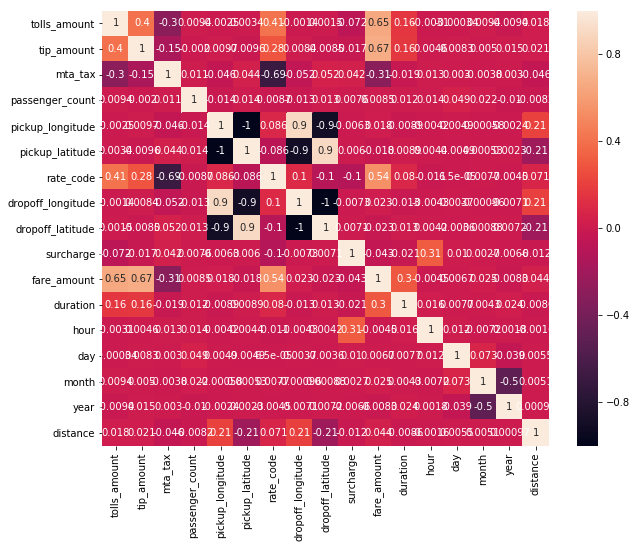

In [15]:
corr=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,)

Text(0.5, 1.0, 'distribution of fare_amount')

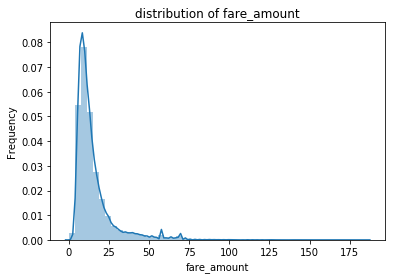

In [16]:
sns.distplot(data.loc[data.fare_amount<200,'fare_amount'])
plt.xlabel("fare_amount")
plt.ylabel("Frequency")
plt.title("distribution of fare_amount")

Text(0, 0.5, 'Frequency')

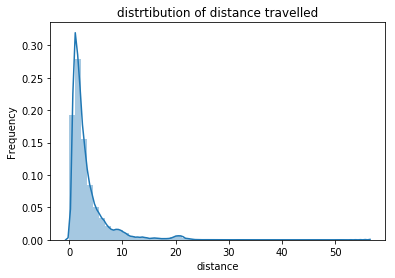

In [17]:
sns.distplot(data.loc[data.distance<200,'distance'])
plt.title("distrtibution of distance travelled")
plt.ylabel("Frequency")

Text(0.5, 1.0, 'passenger count vs fare')

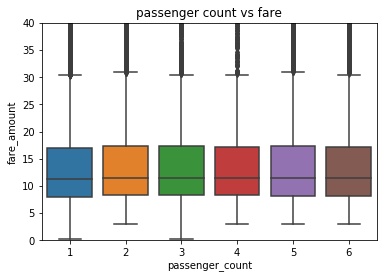

In [18]:
sns.boxplot(x='passenger_count',y='fare_amount',data=data)
plt.ylim(0,40)
plt.title('passenger count vs fare')

Text(0.5, 1.0, 'distance vs fare amount')

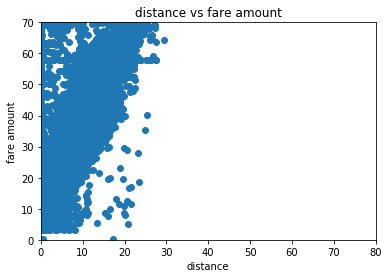

In [19]:
plt.scatter(x='distance',y='fare_amount',data=data)
plt.ylim(0,70)
plt.xlim(0,80)
plt.xlabel('distance')
plt.ylabel('fare amount')
plt.title('distance vs fare amount')

Text(0.5, 1.0, 'duratoin vs fare amount')

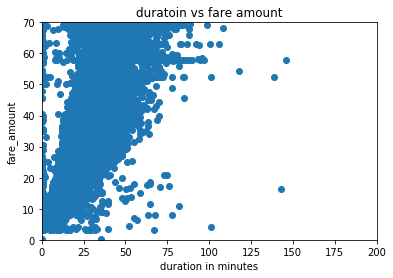

In [20]:
plt.scatter(x='duration',y='fare_amount',data=data)
plt.ylim(0,70)
plt.xlim(0,200)
plt.xlabel('duration in minutes')
plt.ylabel('fare_amount')
plt.title('duratoin vs fare amount')

Text(0.5, 1.0, 'passenger count vs fare')

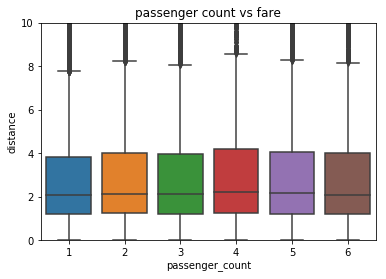

In [21]:
sns.boxplot(x='passenger_count',y='distance',data=data)
plt.ylim(0,10)
plt.title('passenger count vs fare')

In [22]:
#splitting the data into train,validation
y=data.fare_amount
X=data
X.drop('fare_amount',axis=1,inplace=True)

In [23]:
train_X,valid_X,train_y,valid_y=train_test_split(X,y,train_size=0.7,random_state=1)
print(train_X.shape)
print(valid_X.shape)
print(train_y.shape)
print(valid_y.shape)

(58057, 18)
(24883, 18)
(58057,)
(24883,)


In [24]:
#creating lists fro categorical and numeric columns
cat_cols = ["vendor_id","payment_type"]
num_cols = train_X.columns.difference(cat_cols)
num_cols

Index(['day', 'distance', 'dropoff_latitude', 'dropoff_longitude', 'duration',
       'hour', 'month', 'mta_tax', 'passenger_count', 'pickup_latitude',
       'pickup_longitude', 'rate_code', 'surcharge', 'tip_amount',
       'tolls_amount', 'year'],
      dtype='object')

In [25]:
#converting the datatypes 
train_X[cat_cols]=train_X[cat_cols].apply(lambda x:x.astype("category"))
train_X[num_cols]=train_X[num_cols].apply(lambda x:x.astype("float"))



/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [26]:
train_num_data = train_X.loc[:,num_cols]
train_cat_data = train_X.loc[:,cat_cols]

In [27]:
# numeric cols imputation
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_num.fit(train_num_data)
train_num_data = pd.DataFrame(imp_num.transform(train_num_data),columns=num_cols)

# Categorical columns imputation
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

train_cat_data = pd.DataFrame(imp_cat.fit_transform(train_cat_data),columns=cat_cols)

In [28]:
#standardizing the train data
stand=StandardScaler()
stand.fit(train_num_data[train_num_data.columns])
train_num_data[train_num_data.columns]=stand.transform(train_num_data[train_num_data.columns])

In [29]:
train_X=pd.concat([train_num_data,train_cat_data],axis=1)

In [30]:
#creating dummies for categorical columns
train_X=pd.get_dummies(train_X,columns=cat_cols)

In [31]:
train_X.head()

,day,distance,dropoff_latitude,dropoff_longitude,duration,hour,month,mta_tax,passenger_count,pickup_latitude,...,year,vendor_id_DST000401,vendor_id_DST000481,vendor_id_DST000532,vendor_id_DST000543,payment_type_CRD,payment_type_CSH,payment_type_DIS,payment_type_NOC,payment_type_UNK
0,1.364261,-0.064593,0.139404,-0.139270,-0.321807,-2.078341,-0.968966,0.062375,-0.524610,0.141867,...,2.225199,0,0,0,1,1,0,0,0,0
1,-0.944738,-0.028549,0.119022,-0.119615,1.820454,0.225388,-0.968966,0.062375,-0.524610,0.136097,...,2.225199,0,0,0,1,1,0,0,0,0
2,-1.752887,-0.062430,0.143223,-0.138235,-0.063555,0.839716,1.220338,0.062375,-0.524610,0.140484,...,-0.449398,0,0,1,0,1,0,0,0,0
3,1.364261,-0.053525,0.136150,-0.131080,-0.022344,0.839716,-0.968966,0.062375,0.187708,0.136851,...,-0.449398,0,0,1,0,0,1,0,0,0
4,1.248811,-0.058778,0.138694,-0.139273,0.060077,0.839716,-0.968966,0.062375,0.187708,0.143178,...,-0.449398,0,0,1,0,0,1,0,0,0


In [32]:
# preprocessing on validation set
valid_X[cat_cols]=valid_X[cat_cols].apply(lambda x:x.astype("category"))
valid_X[num_cols]=valid_X[num_cols].apply(lambda x:x.astype("float"))
valid_num_data = valid_X.loc[:,num_cols]
valid_cat_data = valid_X.loc[:,cat_cols]

# numeric cols imputation

valid_num_data = pd.DataFrame(imp_num.transform(valid_num_data),columns=num_cols)

# Categorical columns imputation


valid_cat_data = pd.DataFrame(imp_cat.transform(valid_cat_data),columns=cat_cols)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [33]:
#standarding the valdiation data
valid_num_data[valid_num_data.columns]=stand.transform(valid_num_data[valid_num_data.columns])

In [34]:
valid_X=pd.concat([valid_num_data,valid_cat_data],axis=1)

valid_X=pd.get_dummies(valid_X,columns=cat_cols)

In [35]:
#preprocessing on test data
#converting pickup_datetime,dropoff_datetime into datetime
test["pickup_datetime"]=pd.to_datetime(test["pickup_datetime"])
test["dropoff_datetime"]=pd.to_datetime(test["dropoff_datetime"])

#adding a new variable called "duration" 
test['duration']=abs(test['pickup_datetime']-test['dropoff_datetime'])/np.timedelta64(1,'m')

test['hour'] = test.pickup_datetime.dt.hour
test['day'] = test.pickup_datetime.dt.day
test['month'] = test.pickup_datetime.dt.month
test['year'] = test.pickup_datetime.dt.year

#droping unwanted columns
cols_drop=['TID','pickup_datetime','dropoff_datetime','new_user','store_and_fwd_flag']
test.drop(cols_drop,axis=1,inplace=True)

def distance(s_lat, s_lng, e_lat, e_lng):
    
    # approximate radius of earth in km
    R = 6373.0
    
    s_lat = s_lat*np.pi/180.0                      
    s_lng = np.deg2rad(s_lng)     
    e_lat = np.deg2rad(e_lat)                       
    e_lng = np.deg2rad(e_lng)  
    
    d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2
    
    return 2 * R * np.arcsin(np.sqrt(d)) 
test['distance'] = distance(test.pickup_latitude,test.pickup_longitude,test.dropoff_latitude,test.dropoff_longitude)

/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in arcsin
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [36]:
# preprocessing on test set
test[cat_cols]=test[cat_cols].apply(lambda x:x.astype("category"))
test[num_cols]=test[num_cols].apply(lambda x:x.astype("float"))

In [37]:
test_num_data=test.loc[:,num_cols]
test_cat_data=test.loc[:,cat_cols]
# numeric cols imputation

test_num_data = pd.DataFrame(imp_num.transform(test_num_data),columns=num_cols)

# Categorical columns imputation


test_cat_data = pd.DataFrame(imp_cat.transform(test_cat_data),columns=cat_cols)

In [38]:
#standarding the test data
test_num_data[test_num_data.columns]=stand.transform(test_num_data[test_num_data.columns])

In [39]:
test=pd.concat([test_num_data,test_cat_data],axis=1)

test=pd.get_dummies(test,columns=cat_cols)

In [40]:
# MODEL1 LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
lir=LinearRegression()
lir.fit(train_X,train_y)

train_preds1=lir.predict(train_X)
valid_preds1=lir.predict(valid_X)

In [41]:
# MODEL1 PREDICTIONS
print("mean_absolute_error on train data:",mean_absolute_error(train_y,train_preds1))
print("mean_absolute_error on validation data:",mean_absolute_error(valid_y,valid_preds1))

mean_absolute_error on train data: 4.159776273931275
mean_absolute_error on validation data: 4.2118743782112045


In [42]:
# MODEL2 DECISION TREE REGRESSOR 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

dtc=DecisionTreeRegressor()
dtc.fit(train_X,train_y)

train_preds2=dtc.predict(train_X)
valid_preds2=dtc.predict(valid_X)

print("mean_absolute_error on train data:",mean_absolute_error(train_y,train_preds2))
print("mean_absolute_error on validation data:",mean_absolute_error(valid_y,valid_preds2))

mean_absolute_error on train data: 1.014244772896792e-15
mean_absolute_error on validation data: 1.1888912108668577


In [43]:
# MODEL3 KNN REGRESSOR
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3,algorithm="brute",weights="distance")
knn.fit(train_X,train_y)

train_preds3=knn.predict(train_X)
valid_preds3=knn.predict(valid_X)
print("mean_absolute_error on train data:",mean_absolute_error(train_y,train_preds3))
print("mean_absolute_error on validation data:",mean_absolute_error(valid_y,valid_preds3))

mean_absolute_error on train data: 1.4405320085417943e-07
mean_absolute_error on validation data: 2.5180096548114603


In [44]:
# MODEL 4 XGBOOST
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(train_X,train_y)

train_pred4=xgb.predict(train_X)
valid_pred4=xgb.predict(valid_X)

print("mean_absolute_error on train data:",mean_absolute_error(train_y,train_pred4))
print("mean_absolute_error on validation data:",mean_absolute_error(valid_y,valid_pred4))

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:08:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
mean_absolute_error on train data: 1.0154131160055173
mean_absolute_error on validation data: 1.1102912720505966


In [45]:
#hyperparameters tuning
Xgb=XGBRegressor()
n_estimaters=[50,100,150,200]
max_depth=[2,3,5,7]
learnin_rate=[0.05,0.1,0.15,0.20]
min_child_wgt=[1,2,3,4]



hyperparameter={
    "n_estimaters":n_estimaters,
    "max_depth":max_depth,
    "learnin_rate":learnin_rate,
    "min_child_wgt":min_child_wgt,

}

random_cv2=RandomizedSearchCV(estimator=Xgb,param_distributions=hyperparameter,cv=5,n_jobs=-1)

In [46]:
random_cv2.fit(train_X,train_y)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:11:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                

In [47]:
random_cv2.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learnin_rate=0.05, learning_rate=0.1,
             max_delta_step=0, max_depth=7, min_child_weight=1, min_child_wgt=3,
             missing=None, n_estimaters=150, n_estimators=100, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [48]:
#XGBOOST WITH BEST ESTIMATER
Xgb2=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learnin_rate=0.05, learning_rate=0.1,
             max_delta_step=0, max_depth=7, min_child_weight=1, min_child_wgt=2,
             missing=None, n_estimaters=50, n_estimators=100, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

Xgb2.fit(train_X,train_y)


train_pred6=Xgb2.predict(train_X)
valid_pred6=Xgb2.predict(valid_X)

[12:11:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [49]:
print("mean_absolute_error on train data:",mean_absolute_error(train_y,train_pred6))
print("mean_absolute_error on validation data:",mean_absolute_error(valid_y,valid_pred6))

mean_absolute_error on train data: 0.6803083550444824
mean_absolute_error on validation data: 0.9078420249991243


In [50]:
#prediction on test data with Xgboost best estimator
test_predictions=Xgb2.predict(test)
test_prediction=pd.DataFrame(test_predictions)

In [51]:
test_prediction

,0
0,13.907768
1,12.138382
2,6.834709
3,31.313587
4,4.338097
...,...
9769,13.361396
9770,81.624748
9771,11.513578
9772,8.762178
